<a href="https://colab.research.google.com/github/Javier03diaz/Tec-Monterrey/blob/main/TP/Solucion_Reto_SC_63_Javier_Diaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 Importamos pandas y cargamos nuestro archivo en una variable llamada data

In [2]:
# Importar pandas
import pandas as pd

# Cargar los datos en la variable 'data'
data = pd.read_csv('/content/0.xozu243mego0.145c4n51y90bbank_marketing_RETO_DS_AS.csv')

# Visualizamos
data.head()
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


Analizamos la distribucion de la variable Y

In [46]:
data['y'].value_counts(normalize=True)

,proportion
y,
no,0.579222
yes,0.420778


Verificamos los nombres de las columnas

In [47]:
# Verificar los nombres de las columnas
print(data.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


Preparacion de los datos

In [48]:
# Eliminar espacios en los nombres de las columnas si existen
data.columns = data.columns.str.strip()
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


TRANSFORMACION DE LAS VARIABLES NUMERICAS

Estandarizacion

In [50]:
from sklearn.preprocessing import StandardScaler

# Crear el estandarizador
scaler = StandardScaler()

# Variables numéricas a estandarizar
numeric_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Aplicar la estandarización
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Control de calidad
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,-0.865132,self-employed,married,tertiary,no,0.390563,no,no,cellular,-0.673417,nov,-0.106352,-0.189988,0.431706,2.357808,success,yes
1,-1.036605,unemployed,single,unknown,no,0.033567,no,no,cellular,-1.152755,sep,-0.323016,-0.555270,-0.478348,-0.356939,unknown,yes
2,-0.007764,blue-collar,married,secondary,no,0.220974,yes,no,cellular,0.165425,nov,0.045016,-0.555270,-0.478348,-0.356939,unknown,no
3,0.763867,blue-collar,married,secondary,no,-0.461344,yes,no,cellular,0.165425,jul,-0.996754,2.001709,-0.478348,-0.356939,unknown,no
4,-0.093501,admin.,married,secondary,no,-0.489059,no,no,cellular,1.483605,jul,0.421953,-0.189988,1.221038,4.620098,success,yes


In [51]:
# Control de calidad para los datos estandarizados
def quality_check_after_standardization(data):
    print("\nControl de calidad después de la estandarización:\n")

    # Verificar valores nulos
    missing_data = data.isnull().sum()
    print("Valores nulos en las columnas:")
    print(missing_data[missing_data > 0])

    # Verificar duplicados en los registros
    duplicate_rows = data.duplicated().sum()
    print(f"\nNúmero de registros duplicados: {duplicate_rows}")

    # Verificar los tipos de datos de las columnas
    print("\nTipos de datos de las columnas:")
    print(data.dtypes)

    # Observar el rango y media de las columnas estandarizadas
    print("\nEstadísticas descriptivas de las columnas estandarizadas:")
    print(data.describe())

    # Verificar si las columnas estandarizadas tienen una media cercana a 0 y desviación estándar cercana a 1
    print("\nVerificación de las características de las variables estandarizadas:")
    for col in numeric_cols:
        mean = data[col].mean()
        std_dev = data[col].std()
        print(f"Columna: {col}")
        print(f"Media: {mean:.3f} | Desviación estándar: {std_dev:.3f}")
        print("-----------")

# Ejecutar el control de calidad después de la estandarización
quality_check_after_standardization(data)



Control de calidad después de la estandarización:

Valores nulos en las columnas:
Series([], dtype: int64)

Número de registros duplicados: 0

Tipos de datos de las columnas:
age          float64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day          float64
month         object
duration     float64
campaign     float64
pdays        float64
previous     float64
poutcome      object
y             object
dtype: object

Estadísticas descriptivas de las columnas estandarizadas:
                age       balance           day      duration      campaign  \
count  9.000000e+03  9.000000e+03  9.000000e+03  9.000000e+03  9.000000e+03   
mean   3.157968e-18  3.552714e-18  8.684411e-18  3.947460e-18 -4.184307e-17   
std    1.000056e+00  1.000056e+00  1.000056e+00  1.000056e+00  1.000056e+00   
min   -1.979710e+00 -1.498019e+00 -1.751927e+00 -1.041274e+00 -5.552703e-01   

Transformacion variable 'education'

In [52]:
from sklearn.preprocessing import LabelEncoder

# Crear el codificador
label_encoder = LabelEncoder()

# Transformar la columna 'education'
data['education'] = label_encoder.fit_transform(data['education'])

# Control de calidad después de la transformación
# Verificar si hay valores nulos
missing_values = data['education'].isnull().sum()

# Verificar los valores únicos de la columna para asegurar que se asignaron correctamente los valores
unique_values = data['education'].unique()

# Verificar la distribución de los valores transformados
value_counts = data['education'].value_counts()

# Mostrar los resultados del control de calidad
missing_values, unique_values, value_counts.head()


(0,
 array([2, 3, 1, 0]),
 education
 1    4486
 2    2893
 0    1244
 3     377
 Name: count, dtype: int64)

Aplicamos label encoder a las variables binarias

In [53]:
from sklearn.preprocessing import LabelEncoder

# Crear el codificador
le = LabelEncoder()

# Variables binarias
binary_columns = ['default', 'housing', 'loan']

# Aplicar LabelEncoder a las variables binarias
for col in binary_columns:
    data[col] = le.fit_transform(data[col])

# Verificar las primeras filas después de la transformación
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,-0.865132,self-employed,married,2,0,0.390563,0,0,cellular,-0.673417,nov,-0.106352,-0.189988,0.431706,2.357808,success,yes
1,-1.036605,unemployed,single,3,0,0.033567,0,0,cellular,-1.152755,sep,-0.323016,-0.555270,-0.478348,-0.356939,unknown,yes
2,-0.007764,blue-collar,married,1,0,0.220974,1,0,cellular,0.165425,nov,0.045016,-0.555270,-0.478348,-0.356939,unknown,no
3,0.763867,blue-collar,married,1,0,-0.461344,1,0,cellular,0.165425,jul,-0.996754,2.001709,-0.478348,-0.356939,unknown,no
4,-0.093501,admin.,married,1,0,-0.489059,0,0,cellular,1.483605,jul,0.421953,-0.189988,1.221038,4.620098,success,yes


Control de calidad a las variables binarias

In [54]:
# Definir las variables binarias transformadas
binary_columns = ['default', 'housing', 'loan']

# Verificar si hay valores nulos en las columnas binarias
null_values = data[binary_columns].isnull().sum()

# Verificar la distribución de las variables binarias (0 y 1)
binary_distribution = data[binary_columns].apply(lambda x: x.value_counts(normalize=True))

# Verificar los tipos de datos de las columnas binarias
data_types = data[binary_columns].dtypes

# Verificar si los valores son 0 y 1 en las columnas binarias
unique_values = data[binary_columns].apply(lambda x: x.unique())

# Mostrar resultados del control de calidad
print("Valores nulos en las columnas binarias:")
print(null_values)
print("\nDistribución de las variables binarias (0 y 1):")
print(binary_distribution)
print("\nTipos de datos de las columnas binarias:")
print(data_types)
print("\nValores únicos en las columnas binarias (deberían ser 0 y 1):")
print(unique_values)


Valores nulos en las columnas binarias:
default    0
housing    0
loan       0
dtype: int64

Distribución de las variables binarias (0 y 1):
   default   housing      loan
0    0.985  0.507111  0.868889
1    0.015  0.492889  0.131111

Tipos de datos de las columnas binarias:
default    int64
housing    int64
loan       int64
dtype: object

Valores únicos en las columnas binarias (deberían ser 0 y 1):
   default  housing  loan
0        0        0     0
1        1        1     1


In [59]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,-0.865132,self-employed,married,2,0,0.390563,0,0,cellular,-0.673417,nov,-0.106352,-0.189988,0.431706,2.357808,success,yes
1,-1.036605,unemployed,single,3,0,0.033567,0,0,cellular,-1.152755,sep,-0.323016,-0.555270,-0.478348,-0.356939,unknown,yes
2,-0.007764,blue-collar,married,1,0,0.220974,1,0,cellular,0.165425,nov,0.045016,-0.555270,-0.478348,-0.356939,unknown,no
3,0.763867,blue-collar,married,1,0,-0.461344,1,0,cellular,0.165425,jul,-0.996754,2.001709,-0.478348,-0.356939,unknown,no
4,-0.093501,admin.,married,1,0,-0.489059,0,0,cellular,1.483605,jul,0.421953,-0.189988,1.221038,4.620098,success,yes


Realizo una copia de mi dataset

In [56]:
# Hacer una copia del dataset original
data_copy = data.copy()

# Verificar que la copia fue exitosa
data_copy.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,-0.865132,self-employed,married,2,0,0.390563,0,0,cellular,-0.673417,nov,-0.106352,-0.189988,0.431706,2.357808,success,yes
1,-1.036605,unemployed,single,3,0,0.033567,0,0,cellular,-1.152755,sep,-0.323016,-0.555270,-0.478348,-0.356939,unknown,yes
2,-0.007764,blue-collar,married,1,0,0.220974,1,0,cellular,0.165425,nov,0.045016,-0.555270,-0.478348,-0.356939,unknown,no
3,0.763867,blue-collar,married,1,0,-0.461344,1,0,cellular,0.165425,jul,-0.996754,2.001709,-0.478348,-0.356939,unknown,no
4,-0.093501,admin.,married,1,0,-0.489059,0,0,cellular,1.483605,jul,0.421953,-0.189988,1.221038,4.620098,success,yes


Transformacion de la variable y

In [60]:
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Transformar la variable 'y'
data_copy['y'] = label_encoder.fit_transform(data_copy['y'])

# Verificar los primeros valores de la columna 'y' transformada
data_copy[['y']].head()


,y
0,1
1,1
2,0
3,0
4,1


Control de calidad de la variable y

In [61]:
# valores nulos en la variable 'y'
null_values_y = data_copy['y'].isnull().sum()

# Verificar la distribución de la variable 'y' (entre 0 y 1)
distribution_y = data_copy['y'].value_counts(normalize=True)

# Verificar el tipo de datos de la columna 'y'
data_type_y = data_copy['y'].dtype

# Verificar los valores únicos en la columna 'y'
unique_values_y = data_copy['y'].unique()

# Imprimir los resultados de control de calidad para la variable 'y'
print("Valores nulos en la columna 'y':", null_values_y)
print("\nDistribución de la variable 'y' (0 y 1):\n", distribution_y)
print("\nTipo de dato de la columna 'y':", data_type_y)
print("\nValores únicos en la columna 'y':", unique_values_y)


Valores nulos en la columna 'y': 0

Distribución de la variable 'y' (0 y 1):
 y
0    0.579222
1    0.420778
Name: proportion, dtype: float64

Tipo de dato de la columna 'y': int64

Valores únicos en la columna 'y': [1 0]


Transformacion de las variables categoricas usando onehotencoder

In [62]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Seleccionar las variables categóricas no binarias
categorical_columns = ['job', 'marital', 'contact', 'month', 'poutcome']

# Crear un pipeline con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ], remainder='passthrough'  # Las columnas no categóricas se mantendrán sin cambios
)

# Aplicar la transformación y generar el nuevo dataset
data_encoded = preprocessor.fit_transform(data_copy)

# Convertir el resultado a un DataFrame
data_encoded_df = pd.DataFrame(data_encoded, columns=preprocessor.get_feature_names_out())

# Ver las primeras filas del dataset transformado
data_encoded_df.head()


,cat__job_blue-collar,cat__job_entrepreneur,cat__job_housemaid,cat__job_management,cat__job_retired,cat__job_self-employed,cat__job_services,cat__job_student,cat__job_technician,cat__job_unemployed,...,remainder__default,remainder__balance,remainder__housing,remainder__loan,remainder__day,remainder__duration,remainder__campaign,remainder__pdays,remainder__previous,remainder__y
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.390563,0.0,0.0,-0.673417,-0.106352,-0.189988,0.431706,2.357808,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.033567,0.0,0.0,-1.152755,-0.323016,-0.555270,-0.478348,-0.356939,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.220974,1.0,0.0,0.165425,0.045016,-0.555270,-0.478348,-0.356939,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.461344,1.0,0.0,0.165425,-0.996754,2.001709,-0.478348,-0.356939,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.489059,0.0,0.0,1.483605,0.421953,-0.189988,1.221038,4.620098,1.0


In [63]:
# Verificar si hay valores nulos
null_values_encoded = data_encoded_df.isnull().sum()

# Verificar los tipos de datos
data_types_encoded = data_encoded_df.dtypes

# Verificar la distribución de las variables categóricas transformadas (0 y 1)
distribution_encoded = data_encoded_df.mean()

# Verificar los valores únicos en las columnas transformadas
unique_values_encoded = data_encoded_df.nunique()

# Imprimir los resultados de control de calidad
print("Valores nulos en las columnas categóricas transformadas:\n", null_values_encoded)
print("\nTipos de datos de las columnas transformadas:\n", data_types_encoded)
print("\nDistribución de las variables transformadas (0 y 1):\n", distribution_encoded)
print("\nValores únicos en las columnas transformadas:\n", unique_values_encoded)


Valores nulos en las columnas categóricas transformadas:
 cat__job_blue-collar      0
cat__job_entrepreneur     0
cat__job_housemaid        0
cat__job_management       0
cat__job_retired          0
cat__job_self-employed    0
cat__job_services         0
cat__job_student          0
cat__job_technician       0
cat__job_unemployed       0
cat__job_unknown          0
cat__marital_married      0
cat__marital_single       0
cat__contact_telephone    0
cat__contact_unknown      0
cat__month_aug            0
cat__month_dec            0
cat__month_feb            0
cat__month_jan            0
cat__month_jul            0
cat__month_jun            0
cat__month_mar            0
cat__month_may            0
cat__month_nov            0
cat__month_oct            0
cat__month_sep            0
cat__poutcome_other       0
cat__poutcome_success     0
cat__poutcome_unknown     0
remainder__age            0
remainder__education      0
remainder__default        0
remainder__balance        0
remainder__housing

GENERACION DEL MODELO

Division de los datos en conjuntos de entrenamiento, validacion y prueba

In [64]:
from sklearn.model_selection import train_test_split

# X son las variables de entrada (features) y y es la variable de salida (target)
X = data_encoded_df.drop(columns=['remainder__y'])  # Eliminamos la columna 'y' de X
y = data_encoded_df['remainder__y']  # 'y' es la variable objetivo

# Dividir los datos en entrenamiento (60%), validación (20%) y prueba (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Comprobamos las dimensiones de los conjuntos
(X_train.shape, X_val.shape, X_test.shape)


((5400, 40), (1800, 40), (1800, 40))

Aplicacion regresion logistica al modelo de entrenamiento

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Inicializamos el modelo de Regresión Logística
model = LogisticRegression(max_iter=1000, random_state=42)

# Entrenamos el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizamos predicciones sobre el conjunto de validación
y_val_pred = model.predict(X_val)

# Evaluamos el rendimiento del modelo con la matriz de confusión
conf_matrix = confusion_matrix(y_val, y_val_pred)
class_report = classification_report(y_val, y_val_pred)

# Mostramos la matriz de confusión y el reporte de clasificación
print("Matriz de confusión:\n", conf_matrix)
print("\nReporte de clasificación:\n", class_report)


Matriz de confusión:
 [[925 133]
 [185 557]]

Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.83      0.87      0.85      1058
         1.0       0.81      0.75      0.78       742

    accuracy                           0.82      1800
   macro avg       0.82      0.81      0.82      1800
weighted avg       0.82      0.82      0.82      1800



Ajuste del modelo

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Definir los parámetros a ajustar
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parámetros de regularización
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'saga'],  # Diferentes solvers
    'max_iter': [100, 200, 300]  # Iteraciones
}

# Crear el modelo de regresión logística
logreg = LogisticRegression()

# Aplicar GridSearchCV para encontrar los mejores parámetros
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar el modelo con los mejores parámetros
grid_search.fit(X_train, y_train)

# Ver el mejor conjunto de parámetros
print("Mejores parámetros:", grid_search.best_params_)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Evaluar el modelo en el conjunto de validación
y_val_pred = best_model.predict(X_val)
y_val_proba = best_model.predict_proba(X_val)[:, 1]

# Imprimir la matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report
print("Matriz de confusión:")
print(confusion_matrix(y_val, y_val_pred))

# Imprimir el reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_val, y_val_pred))


Mejores parámetros: {'C': 0.1, 'max_iter': 100, 'solver': 'saga'}
Matriz de confusión:
[[927 131]
 [192 550]]

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85      1058
         1.0       0.81      0.74      0.77       742

    accuracy                           0.82      1800
   macro avg       0.82      0.81      0.81      1800
weighted avg       0.82      0.82      0.82      1800



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


El modelo no ajusta correctamente, vamos a hacer resampling

In [72]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Aplicamos SMOTE en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verificamos la distribución de las clases después de aplicar SMOTE
print(f'Distribución de clases después de SMOTE: {Counter(y_train_resampled)}')

# Entrenamos nuevamente el modelo con los datos sobremuestreados
model_resampled = LogisticRegression(C=0.1, max_iter=100, solver='saga', random_state=42)
model_resampled.fit(X_train_resampled, y_train_resampled)

# Realizamos las predicciones en el conjunto de validación
y_val_pred_resampled = model_resampled.predict(X_val)

# Matriz de confusión y reporte de clasificación
from sklearn.metrics import confusion_matrix, classification_report
cm_resampled = confusion_matrix(y_val, y_val_pred_resampled)
print("Matriz de confusión (con SMOTE):")
print(cm_resampled)
print("\nReporte de clasificación (con SMOTE):")
print(classification_report(y_val, y_val_pred_resampled))


Distribución de clases después de SMOTE: Counter({1.0: 3150, 0.0: 3150})
Matriz de confusión (con SMOTE):
[[880 178]
 [149 593]]

Reporte de clasificación (con SMOTE):
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84      1058
         1.0       0.77      0.80      0.78       742

    accuracy                           0.82      1800
   macro avg       0.81      0.82      0.81      1800
weighted avg       0.82      0.82      0.82      1800



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


ajuste con 300 iteraciones

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Ajustar el modelo de Regresión Logística con 300 iteraciones
model_resampled_300 = LogisticRegression(C=0.1, max_iter=300, solver='saga', random_state=42)

# Entrenar el modelo con los datos sobremuestreados
model_resampled_300.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones en el conjunto de validación
y_val_pred_resampled_300 = model_resampled_300.predict(X_val)

# Evaluar el modelo con la matriz de confusión y el reporte de clasificación
cm_resampled_300 = confusion_matrix(y_val, y_val_pred_resampled_300)
print("Matriz de confusión (con 300 iteraciones):")
print(cm_resampled_300)

cr_resampled_300 = classification_report(y_val, y_val_pred_resampled_300)
print("\nReporte de clasificación (con 300 iteraciones):")
print(cr_resampled_300)


Matriz de confusión (con 300 iteraciones):
[[880 178]
 [149 593]]

Reporte de clasificación (con 300 iteraciones):
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84      1058
         1.0       0.77      0.80      0.78       742

    accuracy                           0.82      1800
   macro avg       0.81      0.82      0.81      1800
weighted avg       0.82      0.82      0.82      1800



Distintos valores de C

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Definimos los valores a probar para el parámetro 'C'
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Creamos el modelo de regresión logística
logreg = LogisticRegression(max_iter=300, solver='saga', random_state=42)

# Configuramos GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Entrenamos el modelo con los datos sobremuestreados
grid_search.fit(X_train_resampled, y_train_resampled)

# Mostramos los mejores parámetros y el mejor resultado
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación de validación cruzada:", grid_search.best_score_)

# Entrenamos nuevamente con los mejores parámetros
best_logreg = grid_search.best_estimator_
best_logreg.fit(X_train_resampled, y_train_resampled)

# Predecimos en el conjunto de validación
y_val_pred_best = best_logreg.predict(X_val)

# Calculamos y mostramos la matriz de confusión y el reporte de clasificación
cm_best = confusion_matrix(y_val, y_val_pred_best)
print("\nMatriz de confusión (con los mejores parámetros):")
print(cm_best)

print("\nReporte de clasificación (con los mejores parámetros):")
print(classification_report(y_val, y_val_pred_best))


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Mejores parámetros: {'C': 0.1}
Mejor puntuación de validación cruzada: 0.8304761904761906

Matriz de confusión (con los mejores parámetros):
[[880 178]
 [149 593]]

Reporte de clasificación (con los mejores parámetros):
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84      1058
         1.0       0.77      0.80      0.78       742

    accuracy                           0.82      1800
   macro avg       0.81      0.82      0.81      1800
weighted avg       0.82      0.82      0.82      1800



Analisis de las variables

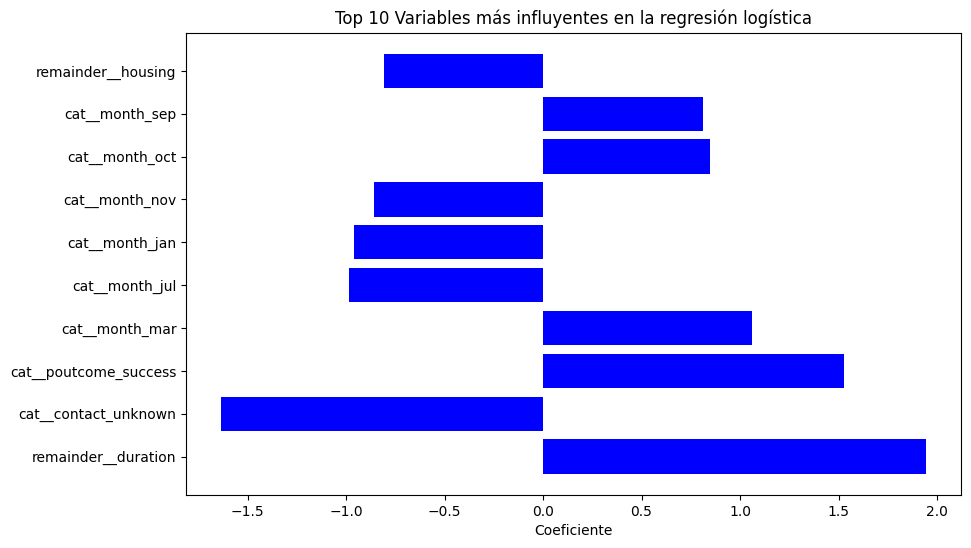

,Feature,Coefficient
36,remainder__duration,1.943298
14,cat__contact_unknown,-1.632878
27,cat__poutcome_success,1.527007
21,cat__month_mar,1.060438
19,cat__month_jul,-0.983608
18,cat__month_jan,-0.960341
23,cat__month_nov,-0.855825
24,cat__month_oct,0.847220
25,cat__month_sep,0.812053
33,remainder__housing,-0.808689


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Obtener los coeficientes del modelo ajustado
coefficients = model_resampled.coef_[0]

# Crear un DataFrame con los coeficientes y las características
coef_df = pd.DataFrame({
    'Feature': X_train.columns,  # Nombres de las características
    'Coefficient': coefficients  # Coeficientes de las características
})

# Ordenar las características por el valor absoluto del coeficiente
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Visualizar las características más influyentes
plt.figure(figsize=(10, 6))
plt.barh(coef_df_sorted['Feature'][:10], coef_df_sorted['Coefficient'][:10], color='blue')
plt.xlabel('Coeficiente')
plt.title('Top 10 Variables más influyentes en la regresión logística')
plt.show()

# Mostrar el DataFrame con coeficientes ordenados
coef_df_sorted[['Feature', 'Coefficient']].head(10)


ajste para trabajar con las variables mas relevantes

In [77]:
# Selección de variables relevantes según los coeficientes
# Seleccionamos las variables con coeficientes más significativos
selected_features = [
    'remainder__duration', 'cat__contact_unknown', 'cat__poutcome_success',
    'cat__month_mar', 'cat__month_oct', 'cat__month_sep', 'remainder__housing'
]

# Filtramos el conjunto de datos para que solo contenga las variables seleccionadas
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]

# Volver a aplicar SMOTE para tratar el desequilibrio de clases
smote = SMOTE(random_state=42)
X_train_resampled_selected, y_train_resampled_selected = smote.fit_resample(X_train_selected, y_train)

# Entrenar el modelo con las nuevas variables seleccionadas
model_selected = LogisticRegression(C=0.1, max_iter=300, solver='saga', random_state=42)
model_selected.fit(X_train_resampled_selected, y_train_resampled_selected)

# Realizar predicciones en el conjunto de validación
y_val_pred_selected = model_selected.predict(X_val_selected)

# Evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report
cm_selected = confusion_matrix(y_val, y_val_pred_selected)
print("Matriz de confusión (con variables seleccionadas):")
print(cm_selected)
print("\nReporte de clasificación (con variables seleccionadas):")
print(classification_report(y_val, y_val_pred_selected))


Matriz de confusión (con variables seleccionadas):
[[895 163]
 [180 562]]

Reporte de clasificación (con variables seleccionadas):
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84      1058
         1.0       0.78      0.76      0.77       742

    accuracy                           0.81      1800
   macro avg       0.80      0.80      0.80      1800
weighted avg       0.81      0.81      0.81      1800



Creacion del modelo de red neuronal

In [79]:
# Crear el modelo base de Red Neuronal
mlp = MLPClassifier(max_iter=500, random_state=42)

# Ajuste de parámetros más limitado
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],  # Probar con 1 capa de 50 y 100 neuronas
    'activation': ['relu'],  # Solo probar con ReLU
    'solver': ['adam'],  # Solo usar Adam
    'alpha': [0.001],  # Probar con una regularización moderada
    'learning_rate': ['constant']  # Usar tasa de aprendizaje constante
}

# Realizamos la búsqueda en la cuadrícula (GridSearchCV) con validación cruzada 3
grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Imprimir los mejores parámetros
print(f"Mejores parámetros: {grid_search.best_params_}")

# Realizar las predicciones con el conjunto de validación
y_val_pred_mlp = grid_search.best_estimator_.predict(X_val)

# Calcular la matriz de confusión y el reporte de clasificación
cm_mlp = confusion_matrix(y_val, y_val_pred_mlp)
print("Matriz de confusión (Red Neuronal):")
print(cm_mlp)

print("\nReporte de clasificación (Red Neuronal):")
print(classification_report(y_val, y_val_pred_mlp))


Mejores parámetros: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Matriz de confusión (Red Neuronal):
[[906 152]
 [154 588]]

Reporte de clasificación (Red Neuronal):
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86      1058
         1.0       0.79      0.79      0.79       742

    accuracy                           0.83      1800
   macro avg       0.82      0.82      0.82      1800
weighted avg       0.83      0.83      0.83      1800



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


aumentamos las iteraciones

In [80]:
# Ajustamos el número de iteraciones a 1000
mlp = MLPClassifier(
    activation='relu',
    alpha=0.001,
    hidden_layer_sizes=(100,),
    learning_rate='constant',
    solver='adam',
    max_iter=1000,  # Aumento de iteraciones
    random_state=42
)

# Realizamos la búsqueda en la cuadrícula (GridSearchCV) para encontrar los mejores parámetros
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Imprimir los mejores parámetros
print(f"Mejores parámetros: {grid_search.best_params_}")

# Realizamos las predicciones con el mejor modelo encontrado
best_model = grid_search.best_estimator_
y_val_pred_nn = best_model.predict(X_val)

# Matriz de confusión y reporte de clasificación
from sklearn.metrics import confusion_matrix, classification_report

cm_nn = confusion_matrix(y_val, y_val_pred_nn)
print("Matriz de confusión (Red Neuronal con más iteraciones):")
print(cm_nn)
print("\nReporte de clasificación (Red Neuronal con más iteraciones):")
print(classification_report(y_val, y_val_pred_nn))


Mejores parámetros: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Matriz de confusión (Red Neuronal con más iteraciones):
[[910 148]
 [160 582]]

Reporte de clasificación (Red Neuronal con más iteraciones):
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86      1058
         1.0       0.80      0.78      0.79       742

    accuracy                           0.83      1800
   macro avg       0.82      0.82      0.82      1800
weighted avg       0.83      0.83      0.83      1800



Evaluacion del desempeno en nuestro mejor modelo

In [81]:
# Realizamos las predicciones en el conjunto de prueba
y_test_pred = grid_search.best_estimator_.predict(X_test)

# Calcular la matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report
cm_test = confusion_matrix(y_test, y_test_pred)

# Mostrar la matriz de confusión
print("Matriz de confusión (conjunto de prueba):")
print(cm_test)

# Mostrar el reporte de clasificación
print("\nReporte de clasificación (conjunto de prueba):")
print(classification_report(y_test, y_test_pred))


Matriz de confusión (conjunto de prueba):
[[849 156]
 [160 635]]

Reporte de clasificación (conjunto de prueba):
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      1005
         1.0       0.80      0.80      0.80       795

    accuracy                           0.82      1800
   macro avg       0.82      0.82      0.82      1800
weighted avg       0.82      0.82      0.82      1800

